In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas as pd
import numpy as np

In [11]:
cac40 = pd.read_html('https://en.wikipedia.org/wiki/CAC_40')[4]
cac40

,Company,Sector,GICS Sub-Industry,Ticker
0,Air Liquide,Basic Materials,Industrial Gases,AI.PA
1,Airbus,Industrials,Aerospace & Defense,AIR.PA
2,Alstom,Industrials,Rail Transport,ALO.PA
3,ArcelorMittal,Basic Materials,Steel,MT.AS
4,AXA,Financial Services,Life & Health Insurance,CS.PA
5,BNP Paribas,Financial Services,Diversified Banks,BNP.PA
6,Bouygues,Industrials,Construction & Engineering,EN.PA
7,Capgemini,Technology,IT Consulting & Other Services,CAP.PA
8,Carrefour,Consumer Defensive,Hypermarkets & Super Centers,CA.PA
9,Crédit Agricole,Financial Services,Regional Banks,ACA.PA


In [12]:
Tickers = cac40.iloc[[5], [3]]
symbols = Tickers['Ticker'].to_list()
symbols

['BNP.PA']

In [13]:
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

In [14]:
BNP_ticker = yf.Ticker(symbols[0])

BNP = BNP_ticker.history(interval ='1mo', start = '2013-1-1', end = '2023-1-1')

In [15]:
BNP = BNP[['Close']]
BNP

,Close
Date,
2013-01-01 00:00:00+01:00,27.000893
2013-02-01 00:00:00+01:00,25.186619
2013-03-01 00:00:00+01:00,23.395716
2013-04-01 00:00:00+02:00,24.722094
2013-05-01 00:00:00+02:00,26.483786
...,...
2022-08-01 00:00:00+02:00,46.485001
2022-09-01 00:00:00+02:00,43.605000
2022-10-01 00:00:00+02:00,47.494999


Text(0, 0.5, 'Price')

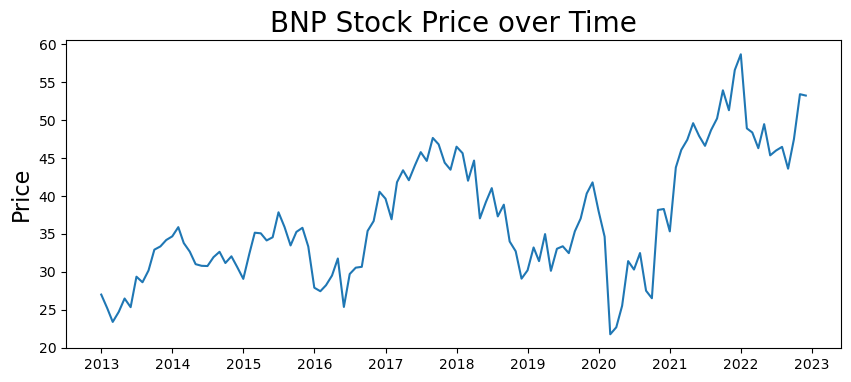

In [16]:
plt.figure(figsize=(10,4))
plt.plot(BNP.Close)
plt.title('BNP Stock Price over Time', fontsize = 20)
plt.ylabel('Price', fontsize=16)

- We can use statsmodels to perform a decomposition of this time series.  

- The decomposition of time series is a statistical task that deconstructs a time series into several components, each representing one of the underlying categories of patterns.  

- With statsmodels we will be able to see the trend, seasonal, and residual components of our data.

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

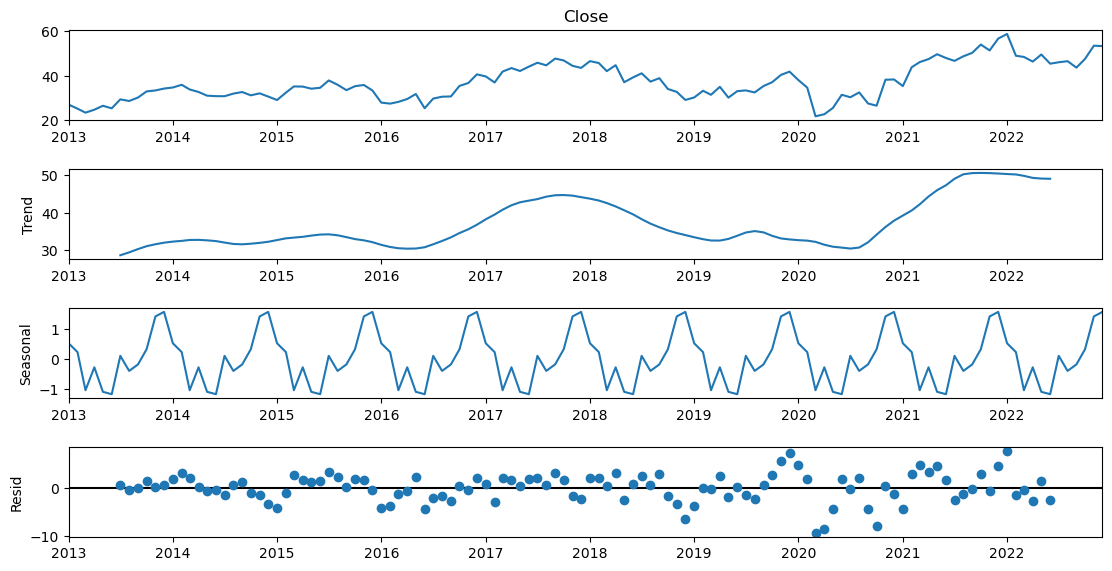

In [18]:
decompose = seasonal_decompose(BNP.Close,model = 'additive',period = 12)
fig_1 = decompose.plot()
fig_1.set_size_inches(12,6)

**We can check stationarity using the following:**

- **Plotting Rolling Statistics:** We can plot the moving average or moving variance and see if it varies with time. Moving average/variance is for any instant ‘t’, the average/variance of the last year (last 12 months).

- **Augmented Dickey Fuller (ADF) test:** is one of the statistical tests for checking stationarity. The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then we can reject the null hypothesis and infer that the time series is indeed stationary.

**Plotting Rolling Statistics**  

We observe that the rolling mean and Standard deviation are not constant with respect to time
The time series is hence not stationary

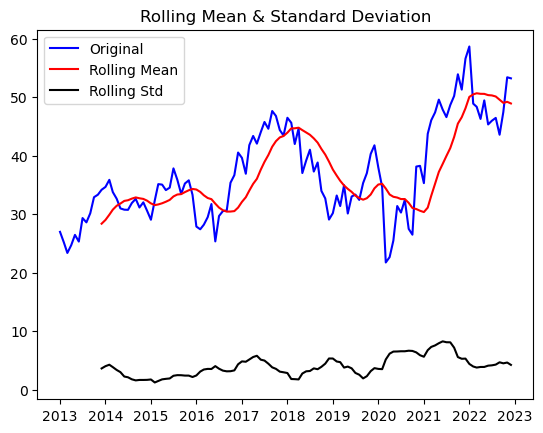

In [19]:
#Determing rolling statistics
rolmean = pd.Series(BNP.Close).rolling(window=12).mean()
rolstd = pd.Series(BNP.Close).rolling(window=12).std()


#Plot rolling statistics:
orig = plt.plot(BNP, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

**Augmented Dickey-Fuller Test:** 

- Null hypothesis: The time series is not stationary
- Rejecting the null hypothesis (p-value < 0.05) will indicate  staionarity

In [20]:
from statsmodels.tsa.stattools import adfuller

In [21]:
#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(BNP.Close, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -1.973547
p-value                          0.298291
#Lags Used                       0.000000
Number of Observations Used    119.000000
dtype: float64


In [22]:
# p-value > 0.05 , the function is not stationary

**Let's built a function for testing stationarity**

In [32]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()


    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:    
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])   
    print (dfoutput)

**Making Time Series Stationary**  

There are 2 major reasons behind non-stationaruty of a time serie:

- Trend – varying mean over time.  

- Seasonality – variations at specific time-frames. 

**Transformations**
- We can apply transformation which penalize higher values more than smaller values. These can be taking a log, square root, cube root, etc. Lets take a log transform here for simplicity:

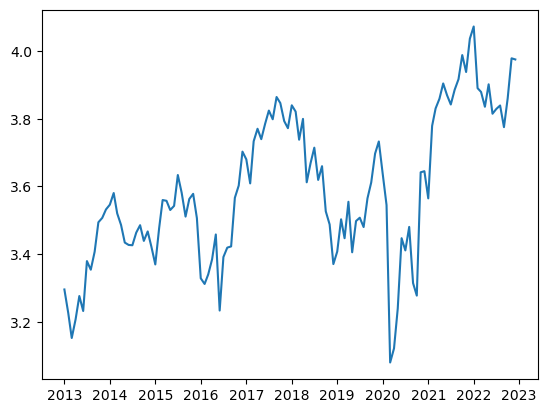

In [33]:
BNP_log = np.log(BNP.Close)
plt.plot(BNP_log)

**Techniques to remove Seasonality and Trend**
 

**Differencing**  

- In this technique, we take the difference of the observation at a particular instant with that at the previous instant.
- First order differencing in Pandas

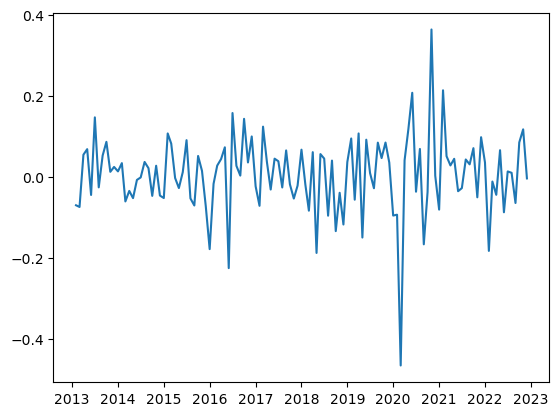

In [34]:
BNP_log_diff = BNP_log - BNP_log.shift()
plt.plot(BNP_log_diff)

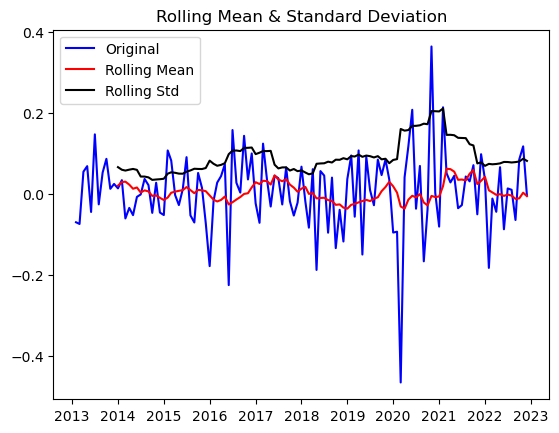

Test Statistic                -1.163641e+01
p-value                        2.199431e-21
#Lags Used                     0.000000e+00
Number of Observations Used    1.180000e+02
dtype: float64


In [35]:
BNP_log_diff.dropna(inplace=True)
test_stationarity(BNP_log_diff)

In [36]:
# P-value < 0.05, the serie is stationary

**Time Series forecasting**  

**Autoregression (AR):**
- The autoregression (AR) method models the next step in the sequence as a linear function of the observations at prior time steps.
- Number of AR (Auto-Regressive) terms (p): p is the parameter associated with the auto-regressive aspect of the model, which incorporates past values i.e lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).

In [21]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

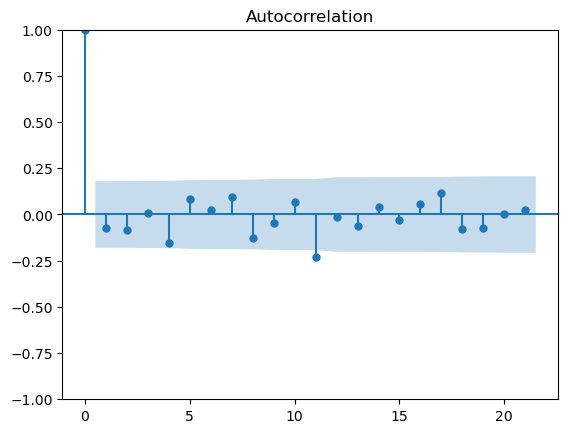

In [22]:
BNP_acf = BNP_log_diff.dropna()
plot_acf(BNP_acf);

ACF show no strong evidence of correlation for the all values. Maybe we should use another model for forecasting